In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [28]:
# 1. Load and merge CSV files
files = ["data/flights/SEA_AA.csv", "data/flights/SEA_AS.csv", "data/flights/SEA_DL.csv", "data/flights/SEA_UA.csv"]
dfs = [pd.read_csv(file) for file in files]
df = pd.concat(dfs, ignore_index=True)

In [29]:
# 2. Aggregate data by Destination Airport
agg_data = df.groupby('Destination Airport').agg({
    'Flight Number': 'count',                     
    'Departure delay (Minutes)': 'mean'          
}).rename(columns={'Flight Number': 'flight_count', 'Departure delay (Minutes)': 'avg_delay'})

In [30]:
# 3. Normalize metrics and compute a composite risk score
scaler = MinMaxScaler()
agg_data[['flight_count_norm', 'avg_delay_norm']] = scaler.fit_transform(
    agg_data[['flight_count', 'avg_delay']]
)

In [31]:
# 4. Compute a composite risk score
agg_data['risk_score'] = 0.6 * agg_data['flight_count_norm'] + 0.4 * agg_data['avg_delay_norm']

In [32]:
# 5. Perform clustering on the risk score (for example, into 3 groups)
kmeans = KMeans(n_clusters=3, random_state=42)
agg_data['risk_cluster'] = kmeans.fit_predict(agg_data[['risk_score']])

In [33]:
# 6. Map destination airport codes to geographic coordinates.
airports = pd.read_csv("data/flights/airports.csv", sep=';')
airport_coords = dict(zip(airports['Airport-Code'], zip(airports['Latitude'], airports['Longitude'])))

In [34]:
# Create columns for latitude and longitude from the mapping dictionary.
agg_data['lat'] = agg_data.index.map(lambda x: airport_coords.get(x, (np.nan, np.nan))[0])
agg_data['lon'] = agg_data.index.map(lambda x: airport_coords.get(x, (np.nan, np.nan))[1])

In [35]:
# 7. Output the airport codes with risk clustering
# Reset index to turn the airport codes into a column.
agg_data_reset = agg_data.reset_index()
output_columns = ['Destination Airport', 'risk_cluster', 'risk_score', 'lat', 'lon']
print("Airport Risk Clustering:")
print(agg_data_reset[output_columns].to_string(index=False))

Airport Risk Clustering:
Destination Airport  risk_cluster  risk_score       lat         lon
                ABQ             0    0.096390 35.040278 -106.609167
                ANC             1    0.539270 61.174444 -149.996389
                ATL             2    0.278835 33.636667  -84.428056
                AUS             2    0.253250 30.194444  -97.670000
                BNA             0    0.152472 36.124444  -86.678056
                BOI             2    0.212177 43.564444 -116.222778
                BOS             0    0.117716 42.363056  -71.000000
                BUR             2    0.200264 34.200000 -118.350000
                BWI             0    0.076135 39.175278  -76.668333
                CHS             0    0.029466 32.898611  -80.040556
                CLT             2    0.264177 35.216667  -80.933333
                CMH             2    0.319217 40.000000  -82.883333
                CVG             0    0.053714 39.048889  -84.667778
                DCA    

In [36]:
# Optionally, save the results to a CSV file.
agg_data_reset[output_columns].to_csv("airport_risk_clusters.csv", index=False)

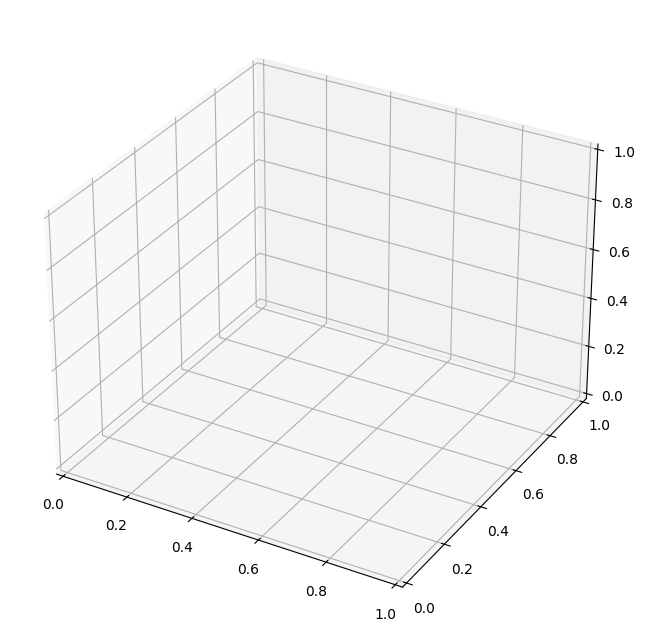

In [37]:
# 8. Visualize the results in a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

In [38]:
# Scatter plot: x=longitude, y=latitude, z=risk_score, colored by risk_cluster
sc = ax.scatter(agg_data_reset['lon'], agg_data_reset['lat'], agg_data_reset['risk_score'], 
                c=agg_data_reset['risk_cluster'], cmap='viridis', s=100)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Risk Score')
ax.set_title("3D Visualization of COVID Transmission Risk from Seattle Flights")

plt.colorbar(sc, label='Risk Cluster')
plt.show()

/var/folders/fm/1gb9yrwn5jn5n0rrwfgvmwzc0000gn/T/ipykernel_45446/499186783.py:10: UserWarning: Adding colorbar to a different Figure <Figure size 1000x800 with 2 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  plt.colorbar(sc, label='Risk Cluster')


<Figure size 640x480 with 0 Axes>

Airport Risk Clustering:
Destination Airport  risk_cluster  risk_score       lat         lon
                ABQ             0    0.096390 35.040278 -106.609167
                ANC             1    0.539270 61.174444 -149.996389
                ATL             2    0.278835 33.636667  -84.428056
                AUS             2    0.253250 30.194444  -97.670000
                BNA             0    0.152472 36.124444  -86.678056
                BOI             2    0.212177 43.564444 -116.222778
                BOS             0    0.117716 42.363056  -71.000000
                BUR             2    0.200264 34.200000 -118.350000
                BWI             0    0.076135 39.175278  -76.668333
                CHS             0    0.029466 32.898611  -80.040556
                CLT             2    0.264177 35.216667  -80.933333
                CMH             2    0.319217 40.000000  -82.883333
                CVG             0    0.053714 39.048889  -84.667778
                DCA    

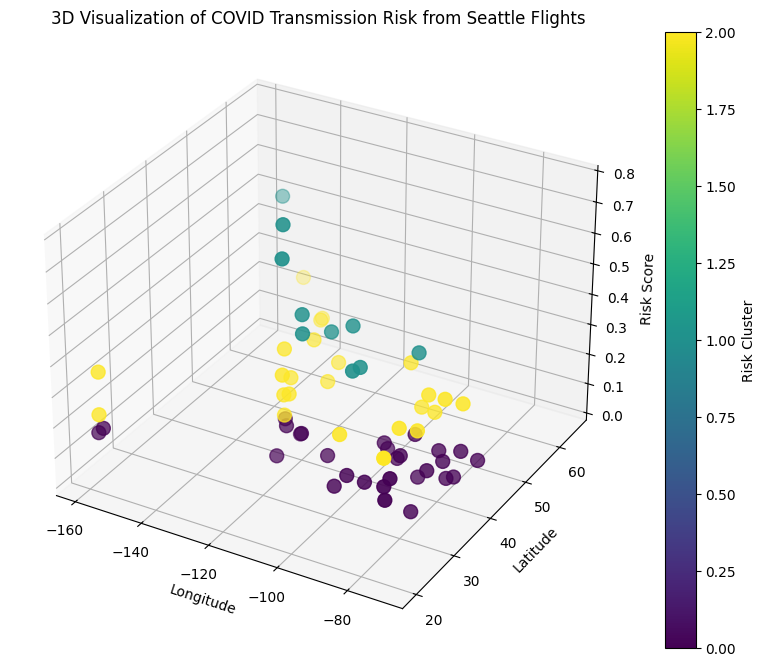

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D  # Enables 3D plotting

# 1. Load and merge CSV files
files = ["data/flights/SEA_AA.csv", "data/flights/SEA_AS.csv", "data/flights/SEA_DL.csv", "data/flights/SEA_UA.csv"]
dfs = [pd.read_csv(file) for file in files]
df = pd.concat(dfs, ignore_index=True)

# 3. Aggregate data by Destination Airport
agg_data = df.groupby('Destination Airport').agg({
    'Flight Number': 'count',                      # Flight count per destination
    'Departure delay (Minutes)': 'mean'            # Average departure delay per destination
}).rename(columns={'Flight Number': 'flight_count', 
                   'Departure delay (Minutes)': 'avg_delay'})

# 4. Normalize metrics and compute a composite risk score
scaler = MinMaxScaler()
agg_data[['flight_count_norm', 'avg_delay_norm']] = scaler.fit_transform(
    agg_data[['flight_count', 'avg_delay']]
)

# Define risk as a weighted combination of flight frequency and delay impact.
# Here, we weight flight count at 60% and average delay at 40%.
agg_data['risk_score'] = 0.6 * agg_data['flight_count_norm'] + 0.4 * agg_data['avg_delay_norm']

# 5. Perform clustering on the risk score (for example, into 3 groups)
kmeans = KMeans(n_clusters=3, random_state=42)
agg_data['risk_cluster'] = kmeans.fit_predict(agg_data[['risk_score']])

# 6. Map destination airport codes to geographic coordinates.
airports = pd.read_csv("data/flights/airports.csv", sep=';')
airport_coords = dict(zip(airports['Airport-Code'], zip(airports['Latitude'], airports['Longitude'])))

# Create columns for latitude and longitude from the mapping dictionary.
agg_data['lat'] = agg_data.index.map(lambda x: airport_coords.get(x, (np.nan, np.nan))[0])
agg_data['lon'] = agg_data.index.map(lambda x: airport_coords.get(x, (np.nan, np.nan))[1])

# Drop rows that don't have coordinate information.
agg_data = agg_data.dropna(subset=['lat', 'lon'])

# 7. Output the airport codes with risk clustering
# Reset index to turn the airport codes into a column.
agg_data_reset = agg_data.reset_index()
output_columns = ['Destination Airport', 'risk_cluster', 'risk_score', 'lat', 'lon']
print("Airport Risk Clustering:")
print(agg_data_reset[output_columns].to_string(index=False))

# Optionally, save the results to a CSV file.
agg_data_reset[output_columns].to_csv("airport_risk_clusters.csv", index=False)

# 8. Visualize the results in a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot: x=longitude, y=latitude, z=risk_score, colored by risk_cluster
sc = ax.scatter(agg_data_reset['lon'], agg_data_reset['lat'], agg_data_reset['risk_score'], 
                c=agg_data_reset['risk_cluster'], cmap='viridis', s=100)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Risk Score')
ax.set_title("3D Visualization of COVID Transmission Risk from Seattle Flights")

plt.colorbar(sc, label='Risk Cluster')
plt.show()